In [71]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
since2017 = requests.get("https://api.energidataservice.dk/datastore_search?resource_id=06380963-b7c6-46b7-aec5-173d15e4648b&limit=421564").json()

In [41]:
d = since2017["result"]['records']

In [42]:
df = pd.DataFrame(d)
df = df.fillna(0)

In [169]:
p17 = df[df.Minutes5DK < "2017-12-31T23:59:59"]
p17 = p17.drop(["Minutes5UTC", "BornholmSE4", "_id"], axis=1)

In [172]:
p17_dk1 = p17[p17.PriceArea == "DK1"]
p17_dk2 = p17[p17.PriceArea == "DK1"]

In [98]:
only2017 = df[df.Minutes5DK < "2017-12-31T23:59:59"]
only2017 = only2017.drop(["Minutes5UTC", "BornholmSE4", "PriceArea", "_id"], axis=1)

In [99]:
# Aggregate on timestamp on timestamp
aggregation_functions = {
    'ExchangeGermany': 'sum', 
    'ExchangeGreatBelt': 'sum', 
    'ExchangeNetherlands' : 'sum',
    'ExchangeNorway' : 'sum',
    'ExchangeSweden' : 'sum',
    'Minutes5DK' : 'sum',
    'OffshoreWindPower' : 'sum',
    'OnshoreWindPower' : 'sum',
    'ProductionGe100MW' : 'sum',
    'ProductionLt100MW' : 'sum',
    'SolarPower' : 'sum',
}
g = only2017.groupby("Minutes5DK").aggregate(aggregation_functions)

In [184]:
def export_data(dataframe, prefix):
    months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
    for i in range(1, 13):
        start = "2017-%s-01T00:00:00" % str(i).zfill(2)
        end = "2017-%s-31T23:59:59" % str(i).zfill(2)
        month_df = dataframe[(start <= dataframe.Minutes5DK) & (dataframe.Minutes5DK <= end)]

        out = pd.DataFrame()
        out["solar"] = month_df.SolarPower
        out["wind"] = month_df.OffshoreWindPower + month_df.OnshoreWindPower
        out["energy"] = month_df.loc[:, month_df.columns != 'Minutes5DK'].sum(axis=1)
        out.index.names = ["time"]

        out.to_csv("data/%s_%s.csv" % (prefix, months[i-1]))

In [181]:
export_data(g, "agg_2017")

In [182]:
export_data(p17_dk1, "dk1_2017")

In [183]:
export_data(p17_dk1, "dk2_2017")

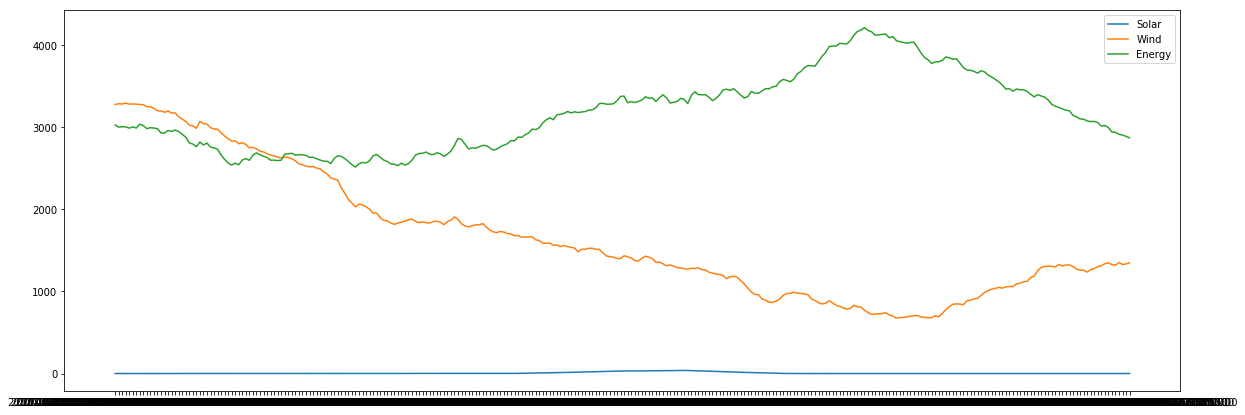

In [129]:
plt.figure(figsize=(20,7))
plt.plot(time, solar)
plt.plot(time, wind)
plt.plot(time, energy)
plt.legend(["Solar", "Wind", "Energy"])
plt.show()